In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
import os
import csv

### Dataset 
This dataset is about Impact of coronavirus (COVID-19) on monthly retail sales development in the United States 2020 and 2021, by retail sector. 
Resource: https://www.statista.com/statistics/1104316/coronavirus-month-over-month-retail-sales-development-by-sector-us/

In [6]:
df = pd.read_csv(os.getcwd()+ '/dataset/retail-sales-by-sector.csv', index_col=0)
df.head()

,Feb to Mar 20,Mar to Apr 20,Apr to May 20,May to Jun 20,Jun to Jul 20,Jul to Aug 20,Aug to Sep 20,Sep to Oct 20,Nov to Dec 20,Dec 20 to Jan 21,Jan to Feb 21
Sector,,,,,,,,,,,
Motor vehicle & parts dealers,-25.7,-12.3,48.7,9.1,-1.2,0.2,3.6,0.4,2.0,3.1,-4.2
Furniture & home furniture stores,-21.1,-48.8,79.1,37.4,0,2.1,0.5,-0.4,-0.7,12.0,-3.8
Electronics & appliance stores,-11,-43.2,36.5,37.6,22.9,0.8,-1.6,1.2,-6.5,14.7,-1.9
Building material & garden equipment & supplies dealers,-0.5,-2.4,12.2,0.8,-2.9,2,0.6,0.9,-0.1,4.6,-3.0
Food & beverage stores,26.9,-12.8,2.2,-1.5,0.2,-1.2,0,-0.2,-1.4,2.4,0.0


### Dataset formate change/clean 
Since this table format cannot directly be read by seaborn to draw the line graph, we need organize the table, and change null number to zero.

In [7]:
sector = df.index.tolist()
print(sector)

['Motor vehicle & parts dealers', 'Furniture & home furniture stores', 'Electronics & appliance stores', 'Building material & garden equipment & supplies dealers', 'Food & beverage stores', 'Health & personal care stores', 'Gasoline stations', 'Clothing & clothing accessories stores', 'Sporting goods, hobby, musical instrument, & book stores', 'General merchandise stores', 'Miscellaneous store retailers', 'Nonstore retailers', 'Food services & drinking places', 'Total retail']


In [8]:
months = list(df.columns)
print(months)

['Feb to Mar 20', 'Mar to Apr 20', 'Apr to May 20', 'May to Jun 20', 'Jun to Jul 20', 'Jul to Aug 20', 'Aug to Sep 20', 'Sep to Oct 20', 'Nov to Dec 20', 'Dec 20 to Jan 21', 'Jan to Feb 21']


In [9]:
arr = df.T.to_numpy().tolist()
print(arr)

[['-25.7', '-21.1', '-11', '-0.5', '26.9', '5', '-16.5', '-49.4', '-17.8', '7.1', '-14.1', '4.9', '-', '-8.3'], ['-12.3', '-48.8', '-43.2', '-2.4', '-12.8', '-14.8', '-24.4', '-75.2', '-33.7', '-13.6', '-25.9', '9.5', '-', '-14.7'], ['48.7', '79.1', '36.5', '12.2', '2.2', '1.5', '11.9', '176.7', '78', '5.9', '16.4', '7.2', '-', '18.2'], ['9.1', '37.4', '37.6', '0.8', '-1.5', '6.9', '14.8', '98.8', '27.6', '2.1', '21.7', '-2.1', '-', '8.4'], ['-1.2', '0', '22.9', '-2.9', '0.2', '3.6', '6.2', '5.7', '-5', '-0.2', '6.2', '0.7', '-', '1.2'], ['0.2', '2.1', '0.8', '2', '-1.2', '0.8', '0.4', '2.9', '-5.7', '-0.4', '-0.2', '0', '-', '0.6'], ['3.6', '0.5', '-1.6', '0.6', '0', '1.7', '1.5', '11', '5.7', '1.8', '1.1', '0.5', '-', '1.9'], ['0.4', '-0.4', '1.2', '0.9', '-0.2', '-0.1', '0.4', '-4.2', '-4.2', '-1.1', '-0.9', '3.1', '-', '0.3'], [2.0, -0.7, -6.5, -0.1, -1.4, 1.0, 6.5, 2.6, -1.4, -1.8, 5.5, -7.3, -4.6, -1.0], [3.1, 12.0, 14.7, 4.6, 2.4, 1.3, 4.0, 5.0, 8.0, 5.5, 1.8, 11.0, 6.9, 5.3], [

In [15]:
with open('newSector.csv', 'a+', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)

    csvwriter.writerow(["Month", "Sector", "Percent"])
    for i in range(len(sector)):
        for j in range(len(months)):
            num = arr[j][i]
            if num == '-':
                num = 0.0
            csvwriter.writerow([months[j]] + [sector[i]] + [float(num)])

So now we have a readable table for seaborn

In [17]:
#print out first 5 rows of data to get idea of content
df = pd.read_csv(os.getcwd()+ '/dataset/newSector.csv')
df.head()

,Month,Sector,Percent
0,Feb to Mar 20,Motor vehicle & parts dealers,-25.7
1,Mar to Apr 20,Motor vehicle & parts dealers,-12.3
2,Apr to May 20,Motor vehicle & parts dealers,48.7
3,May to Jun 20,Motor vehicle & parts dealers,9.1
4,Jun to Jul 20,Motor vehicle & parts dealers,-1.2


<AxesSubplot:xlabel='Month', ylabel='Percent'>

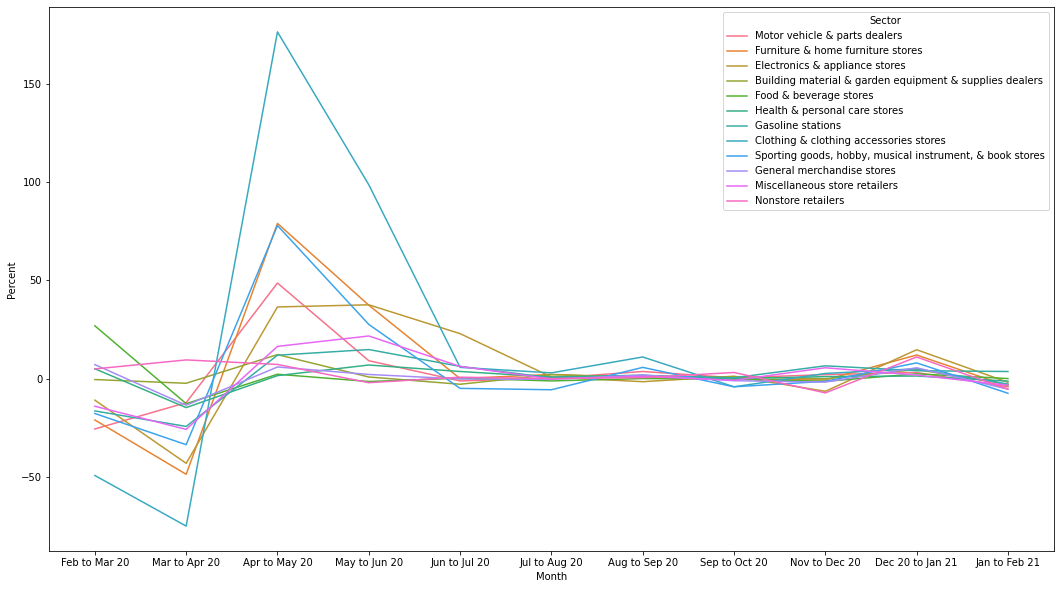

In [18]:
plt.figure(figsize=(18,10))
sns.lineplot(data=df, x="Month", y="Percent", hue="Sector")

As we can see, most of retail have a huge drop down in Mar to Apr 20, then have a huge increase on Apr to May 20, then everything started to come down and be uniformed.

In [20]:
dic = {}
for i in range(len(sector)):
    print(sector[i], end=": ")
    total = 100
    for j in range(len(months)):
        num = arr[j][i]
        if num == '-':
            num = 0
        total = total + total*float(num)/100
    total = format(total, '.2f')
    print(total)
    dic[sector[i]] = total

Motor vehicle & parts dealers: 109.66
Furniture & home furniture stores: 108.70
Electronics & appliance stores: 123.23
Building material & garden equipment & supplies dealers: 111.92
Food & beverage stores: 111.12
Health & personal care stores: 104.00
Gasoline stations: 101.11
Clothing & clothing accessories stores: 83.60
Sporting goods, hobby, musical instrument, & book stores: 110.60
General merchandise stores: 98.13
Miscellaneous store retailers: 99.34
Nonstore retailers: 122.44
Food services & drinking places: 99.43
Total retail: 105.45


In [ ]:
Here we can find out which retail sector increased or decrease after the coronavirus.